# 3.1 (К теоретическим задачам 1-3)

In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Уточним плотность некоторых рапределений:

$\Gamma(\alpha, \lambda):\ p(x)=x^{\alpha-1}\frac{\lambda^{\alpha}e^{-\frac{x}{\lambda}}}{\Gamma(\alpha)}$

$Beta(\alpha, \lambda):\ p(x)=x^{\alpha - 1}\frac{(1-x)^{\lambda - 1}}{B(\alpha, \lambda)}$

$Pareto(\gamma, \theta):\ p(x)=\frac{\gamma \theta^{\gamma}}{x^{\gamma+1}}I(x>\theta)$

In [2]:
# Надо наделать распределений
N = 20**2
K = 10**2

# Нормальное
normalMu, normalSigma = 1, 2
normal = np.random.normal(normalMu, normalSigma, N)

# Гамма
gammaAlpha, gammaLambda = 1, 2
gamma = np.random.gamma(gammaAlpha, 1 / gammaLambda, N)

# Равномерное
uniformA, uniformB = 1, 2
uniform = np.random.uniform(uniformA, uniformB, N)

# Пуассона
poissonLambda = 1
poisson = np.random.poisson(poissonLambda, N)

# Биномиальное
binomialN, binomialP = 2, 1 / 2
binomial = np.random.binomial(binomialN, binomialP, N)

# Геометрическое
geometricP = 1 / 2
geometric = np.random.geometric(geometricP, N)

# Бетта
betaAlpha, betaLambda = 1, 2
beta = np.random.beta(betaAlpha, betaLambda, N)

# Еще одно распределение - распределение Парето
paretoGamma, paretoTheta = 2, 1
pareto = (np.random.pareto(paretoGamma, N) + 1) * paretoTheta

Оценки методом моментов:

1) $N(\mu, \sigma^2):\ \mu\sim\bar{X},\ \sigma^2\sim s^2$

2) $\Gamma(\alpha, \lambda):\ \lambda\sim\frac{\bar{X}^2}{s^2},\ \alpha\sim\frac{\bar{x}}{s^2}$

3) $R(a, b):\ a\sim\bar{X}-\sqrt{3s^2},\ b\sim\bar{X}+\sqrt{3s^2}$

4) $Pois(\lambda):\ \lambda\sim\bar{X}$

5) $Bin(n, p):\ n\sim\frac{\bar{X}^2}{\bar{X}-s^2},\ p\sim1+\bar{X}-\frac{\bar{X^2}}{\bar{X}}$

6) $Geom(p):\ p\sim\frac{1}{\bar{X}}$

7) $Beta(\alpha, \lambda):\ \alpha\sim\frac{\bar{X}(\bar{X}-\bar{X^2})}{s^2},\ \lambda\sim\frac{(1-\bar{X})(\bar{X}-\bar{X^2})}{s^2}$

Оценки методом максимального правдоподобия:

1) $N(\mu, \sigma^2):\ \mu\sim\bar{X},\ \sigma^2\sim s^2$

2) $\Gamma(\alpha, \lambda):\ \lambda\sim\frac{\alpha}{\bar{X}}$

3) $R(a, b):\ a\sim\ X_{(1)},\ b\sim X_{(n)}$

4) $Pois(\lambda):\ \lambda\sim\bar{X}$

5) $Bin(n, p):\ p\sim\frac{\bar{X}}{n}$

6) $Geom(p):\ p\sim\frac{1}{\bar{X}}$

7) $Pareto(2, \theta),\ p(x)=\frac{2\theta^2}{x^3}I(x>\theta):\ \theta\sim X_{(1)}$

In [3]:
# Немного функций подсчета статистик

def getMoments(values, k):
    result = []
    sum = 0
    for n in range(values.size):
        sum += values[n] ** k
        result.append(sum / (n + 1))
    return result

def getS2s(values):
    result = []
    sum, squareSum = 0, 0
    for n in range(values.size):
        sum += values[n]
        squareSum += values[n] ** 2
        result.append(squareSum / (n + 1) - (sum / (n + 1)) ** 2)
    return result

In [4]:
# Пора считать все оценки методом моментов

# Нормальное
normalMuMoments = getMoments(normal, 1)
normalSigmaMoments = getS2s(normal)

# Гамма
gammaMoment1 = getMoments(gamma, 1)
gammaS2 = getS2s(gamma)
gammaAlphaMoments, gammaLambdaMoments = [], []
for n in range(N):
    if gammaS2[n] != 0:
        gammaAlphaMoments.append(gammaMoment1[n] ** 2 / gammaS2[n])
        gammaLambdaMoments.append(gammaMoment1[n] / gammaS2[n])

# Равномерное
uniformMoment1 = getMoments(uniform, 1)
uniformS2 = getS2s(uniform)
uniformAMoments, uniformBMoments = [], []
for n in range(n):
    uniformAMoments.append(uniformMoment1[n] - np.sqrt(3 * uniformS2[n]))
    uniformBMoments.append(uniformMoment1[n] + np.sqrt(3 * uniformS2[n]))

# Пуассоновское
poissonLambdaMoments = getMoments(poisson, 1)

# Биномиальное
binomialMoment1 = getMoments(binomial, 1)
binomialMoment2 = getMoments(binomial, 2)
binomialS2 = getS2s(binomial)
binomialNMoments, binomialPMoments = [], []
for n in range(n):
    if binomialMoment1[n] - binomialS2[n] != 0:
        binomialNMoments.append(binomialMoment1[n] ** 2 / (binomialMoment1[n] - binomialS2[n]))
    if binomialS2[n] != 0:
        binomialPMoments.append(1 + binomialMoment1[n] - binomialMoment2[n] / binomialMoment1[n])

# Геометрическое
geometricMoment1 = getMoments(geometric, 1)
geometricPMoments = []
for n in range(N):
    if geometricMoment1[n] != 0:
        geometricPMoments.append(1 / geometricMoment1[n])

# Бета
betaMoment1 = getMoments(beta, 1)
betaMoment2 = getMoments(beta, 2)
betaS2 = getS2s(beta)
betaAlphaMoments, betaLambdaMoments = [], []
for n in range(N):
    if betaS2[n] != 0:
        betaLambdaMoments.append((1 - betaMoment1[n]) * (betaMoment1[n] - betaMoment2[n]) / betaS2[n])
        betaAlphaMoments.append(betaMoment1[n] * (betaMoment1[n] - betaMoment2[n]) / betaS2[n])

In [5]:
# А теперь оценки методом максимального правдоподобия

# Гамма
gammaLambdaMMP = []
for n in range(1, N):
    gammaLambdaMMP.append(gammaAlpha / gammaMoment1[n])

# Равномерное
uniformAMMP, uniformBMMP = [], []
for n in range(1, N):
    uniformAMMP.append(uniform[:n].min())
    uniformBMMP.append(uniform[:n].max())

# Биномиальное
binomialPMMP = []
for n in range(N):
    binomialPMMP.append(binomialMoment1[n] / binomialN)

# Парето
paretoThetaMMP = []
for n in range(1, N):
    paretoThetaMMP.append(pareto[:n].min())

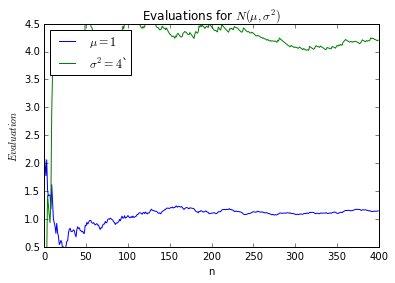

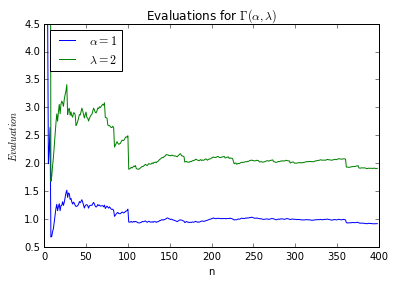

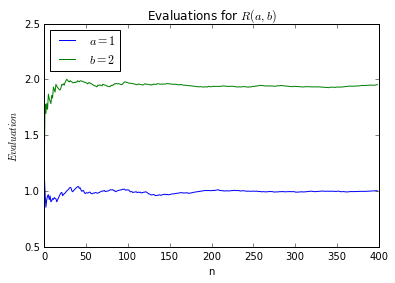

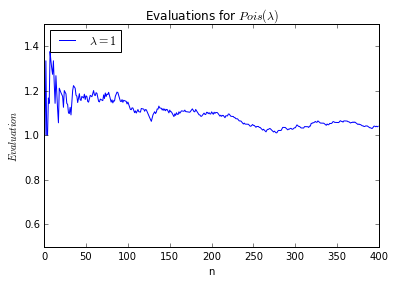

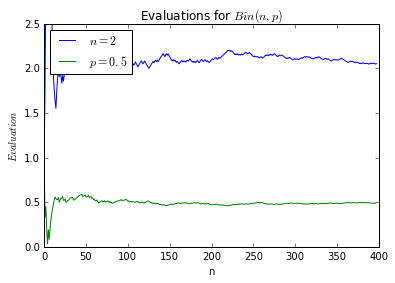

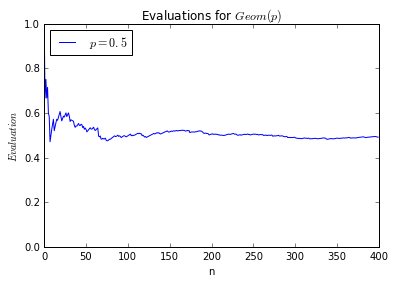

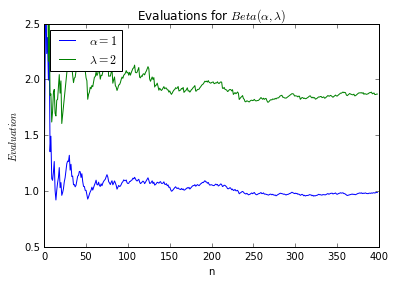

In [6]:
# Графики для оценкок методом моментов

myFigure, myAxis = plt.subplots()
myAxis.plot(normalMuMoments, label=r"$\mu = {}$".format(normalMu))
myAxis.plot(normalSigmaMoments, label=r"$\sigma^2 = {}$`".format(normalSigma ** 2))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(min(normalMu, normalSigma ** 2) - 1 / 2, max(normalMu, normalSigma ** 2) + 1 / 2)
myAxis.set_title("Evaluations for $N(\mu, \sigma^2)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(gammaAlphaMoments, label=r"$\alpha = {}$".format(gammaAlpha))
myAxis.plot(gammaLambdaMoments, label=r"$\lambda = {}$".format(gammaLambda))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(min(gammaAlpha, gammaLambda) - 1 / 2, max(gammaAlpha, gammaLambda ** 2) + 1 / 2)
myAxis.set_title(r"Evaluations for $\Gamma(\alpha, \lambda)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformAMoments, label=r"$a = {}$".format(uniformA))
myAxis.plot(uniformBMoments, label=r"$b = {}$".format(uniformB))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(min(uniformA, uniformB) - 1 / 2, max(uniformA, uniformB) + 1 / 2)
myAxis.set_title(r"Evaluations for $R(a, b)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(poissonLambdaMoments, label=r"$\lambda = {}$".format(poissonLambda))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(poissonLambda - 1 / 2, poissonLambda + 1 / 2)
myAxis.set_title(r"Evaluations for $Pois(\lambda)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(binomialNMoments, label=r"$n = {}$".format(binomialN))
myAxis.plot(binomialPMoments, label=r"$p = {}$".format(binomialP))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(min(binomialN, binomialP) - 1 / 2, max(binomialN, binomialP) + 1 / 2)
myAxis.set_title(r"Evaluations for $Bin(n, p)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(geometricPMoments, label=r"$p = {}$".format(geometricP))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(geometricP - 1 / 2, geometricP + 1 / 2)
myAxis.set_title(r"Evaluations for $Geom(p)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(betaAlphaMoments, label=r"$\alpha = {}$".format(betaAlpha))
myAxis.plot(betaLambdaMoments, label=r"$\lambda = {}$".format(betaLambda))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(min(betaAlpha, betaLambda) - 1 / 2, max(betaAlpha, betaLambda) + 1 / 2)
myAxis.set_title(r"Evaluations for $Beta(\alpha, \lambda)$")

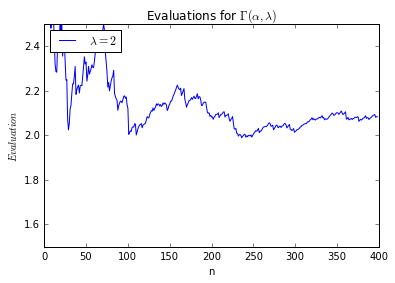

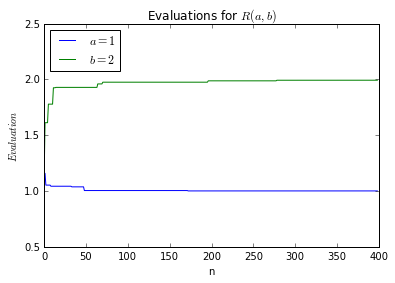

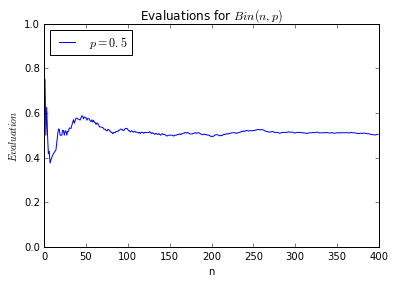

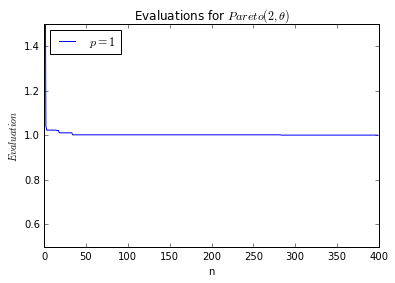

In [7]:
# Графики для оценок методом максимального правдоподобия

myFigure, myAxis = plt.subplots()
myAxis.plot(gammaLambdaMMP, label=r"$\lambda = {}$".format(gammaLambda))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(gammaLambda - 1 / 2, gammaLambda + 1 / 2)
myAxis.set_title(r"Evaluations for $\Gamma(\alpha, \lambda)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformAMMP, label=r"$a = {}$".format(uniformA))
myAxis.plot(uniformBMMP, label=r"$b = {}$".format(uniformB))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(min(uniformA, uniformB) - 1 / 2, max(uniformA, uniformB) + 1 / 2)
myAxis.set_title(r"Evaluations for $R(a, b)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(binomialPMMP, label=r"$p = {}$".format(binomialP))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(binomialP - 1 / 2, binomialP + 1 / 2)
myAxis.set_title(r"Evaluations for $Bin(n, p)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(paretoThetaMMP, label=r"$p = {}$".format(paretoTheta))
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$Evaluation$")
myAxis.set_ylim(paretoTheta - 1 / 2, paretoTheta + 1 / 2)
myAxis.set_title(r"Evaluations for $Pareto(2, \theta)$")

Теперь для каждого распределения и $\forall n\le N$ нагенерируем кучу бутстрепных выборок 

In [8]:
# Нормальное распределение
normalSamples = []
for n in range(min(len(normalMuMoments), len(normalSigmaMoments))):
    normalSamples.append([])
    if n != 0:
        for k in range(K):
            normalSamples[n].append(np.random.normal(normalMuMoments[n], normalSigmaMoments[n], n))

In [9]:
# Равномерное
# Метод моментов
uniformMomentsSamples = []
for n in range(min(len(uniformAMoments), len(uniformBMoments))):
    uniformMomentsSamples.append([])
    if n != 0:
        for k in range(K):
            uniformMomentsSamples[n].append(np.random.uniform(uniformAMoments[n], uniformBMoments[n], n))

# Метод максимального правдоподобия
uniformMMPSamples = []
for n in range(min(len(uniformAMMP), len(uniformBMMP))):
    uniformMMPSamples.append([])
    if n != 0:
        for k in range(K):
            uniformMMPSamples[n].append(np.random.uniform(uniformAMMP[n], uniformBMMP[n], n))

In [10]:
# Пуассоновское
poissonSamples = []
for n in range(len(poissonLambdaMoments)):
    poissonSamples.append([])
    if n != 0:
        for k in range(K):
            poissonSamples[n].append(np.random.poisson(poissonLambdaMoments[n], n))

In [11]:
# Биномиальное
binomialMomentsSamples = []
for n in range(min(len(binomialNMoments), len(binomialPMoments))):
    binomialMomentsSamples.append([])
    if n != 0:
        for k in range(K):
            if (binomialPMoments[n] > 0) and (binomialNMoments[n] > 0):
                binomialMomentsSamples[n].append(np.random.binomial(binomialNMoments[n], binomialPMoments[n], n))

binomialMMPSamples = []
for n in range(len(binomialPMMP)):
    binomialMMPSamples.append([])
    if n != 0:
        for k in range(K):
            if binomialPMMP[n] > 0:
                binomialMMPSamples[n].append(np.random.binomial(binomialN, binomialPMMP[n], n))

In [12]:
# Геометрическое
geometricSamples = []
for n in range(len(geometricPMoments)):
    geometricSamples.append([])
    if n != 0:
        for k in range(K):
            geometricSamples[n].append(np.random.geometric(geometricPMoments[n], n))

In [13]:
# Распределение Парето
paretoSamples = []
for n in range(len(paretoThetaMMP)):
    paretoSamples.append([])
    if n != 0:
        for k in range(K):
            paretoSamples[n].append((np.random.pareto(paretoGamma, n) + 1) * paretoThetaMMP[n])

In [14]:
# Для непараметрического бутстрепа напишем функцию построения оценок

def buildNonparametricSamples(values):
    result = []
    for n in range(N):
        result.append([])
        if n != 0:
            for k in range(K):
                result[n].append([])
                indices = np.random.randint(n, size=n)
                for i in indices:
                    result[n][k].append(values[i])
    return result

In [15]:
# Непараметрические бутстрепные выборки

normalNonparametricSamples = buildNonparametricSamples(normal)

In [16]:
uniformNonparametricSamples = buildNonparametricSamples(uniform)

In [17]:
poissonNonparametricSamples = buildNonparametricSamples(poisson)

In [18]:
binomialNonparametricSamples = buildNonparametricSamples(binomial)

In [19]:
geometricNonparametricSamples = buildNonparametricSamples(geometric)

In [20]:
paretoNonparametricSamples = buildNonparametricSamples(pareto)

In [21]:
# Эти функции статистик считают их для всего массива целиком, а не всех n <= N как прошлые
def getMoment(values, k):
    result = 0
    for value in values:
        result += value ** k
    return result / len(values)

def getS2(values):
    sum, squareSum = 0, 0
    for value in values:
        sum += value
        squareSum += value ** 2
    return squareSum / len(values) - (sum / len(values)) ** 2

Теперь будем считать оценки на бутстрепных выборках. Это будут самые долгие ячейки.

In [22]:
# Нормальное распределение
# Параметрический бутстреп
normalMuBootstrep, normalSigmaBootstrep = [], []
for n in range(len(normalSamples)):
    normalMuBootstrep.append([])
    normalSigmaBootstrep.append([])
    if n != 0:
        for k in range(len(normalSamples[n])):
            normalMuBootstrep[n].append(normalSamples[n][k].sum() / n)
            normalSigmaBootstrep[n].append(getMoment(normalSamples[n][k], 2))

# Непараметрический бутстреп
normalMuNonparametricBootstrep, normalSigmaNonparametricBootstrep = [], []
for n in range(len(normalNonparametricSamples)):
    normalMuNonparametricBootstrep.append([])
    normalSigmaNonparametricBootstrep.append([])
    if n != 0:
        for k in range(len(normalNonparametricSamples[n])):
            normalMuNonparametricBootstrep[n].append(sum(normalNonparametricSamples[n][k]) / n)
            normalSigmaNonparametricBootstrep[n].append(getMoment(normalNonparametricSamples[n][k], 2))

In [23]:
# Равномерное распределение
# Методом моментов
uniformAMomentsBootstrep, uniformBMomentsBootstrep = [], []
for n in range(len(uniformMomentsSamples)):
    uniformAMomentsBootstrep.append([])
    uniformBMomentsBootstrep.append([])
    if n != 0:
        for k in range(len(uniformMomentsSamples[n])):
            averageX = uniformMomentsSamples[n][k].sum() / n
            s2 = getS2(uniformMomentsSamples[n][k])
            uniformAMomentsBootstrep[n].append(averageX - np.sqrt(3 * s2))
            uniformBMomentsBootstrep[n].append(averageX + np.sqrt(3 * s2))

# И методом максимального правдоподобия
uniformAMMPBootstrep, uniformBMMPBootstrep = [], []
for n in range(len(uniformMMPSamples)):
    uniformAMMPBootstrep.append([])
    uniformBMMPBootstrep.append([])
    if n != 0:
        for k in range(len(uniformMMPSamples[n])):
            uniformAMMPBootstrep[n].append(uniformMMPSamples[n][k].min())
            uniformBMMPBootstrep[n].append(uniformMMPSamples[n][k].max())

# Непарметрический бутстреп
uniformANonparametricBootstrep, uniformBNonparametricBootstrep = [], []
for n in range(len(uniformNonparametricSamples)):
    uniformANonparametricBootstrep.append([])
    uniformBNonparametricBootstrep.append([])
    if n != 0:
        for k in range(len(uniformNonparametricSamples[n])):
            uniformANonparametricBootstrep[n].append(min(uniformNonparametricSamples[n][k]))
            uniformBNonparametricBootstrep[n].append(min(uniformNonparametricSamples[n][k]))

In [24]:
# Распределение Пуассона
# Параметрический Бутстреп
poissonLambdaBootstrep = []
for n in range(len(poissonSamples)):
    poissonLambdaBootstrep.append([])
    if n != 0:
        for k in range(len(poissonSamples[n])):
            poissonLambdaBootstrep[n].append(poissonSamples[n][k].sum() / n)

# Непараметрический Бутстреп
poissonLambdaNonparametricBootstrep = []
for n in range(len(poissonNonparametricSamples)):
    poissonLambdaNonparametricBootstrep.append([])
    if n != 0:
        for k in range(len(poissonNonparametricSamples[n])):
            poissonLambdaNonparametricBootstrep[n].append(sum(poissonNonparametricSamples[n][k]) / n)

In [25]:
# Биномиальное распределение
# Методом моментов
binomialNMomentsBootstrep, binomialPMomentsBootstrep = [], []
for n in range(len(binomialMomentsSamples)):
    binomialNMomentsBootstrep.append([])
    binomialPMomentsBootstrep.append([])
    if n != 0:
        for k in range(len(binomialMomentsSamples[n])):
            averageX = binomialMomentsSamples[n][k].sum() / n
            averageX2 = getMoment(binomialMomentsSamples[n][k], 2)
            s2 = getS2(binomialMomentsSamples[n][k])
            if averageX - s2 != 0:
                binomialNMomentsBootstrep[n].append(averageX ** 2 / (averageX - s2))
            if averageX != 0:
                binomialPMomentsBootstrep[n].append(1 + averageX - averageX2 / averageX)

# И методом максимального правдоподобия
binomialPMMPBootstrep = []
for n in range(len(binomialMMPSamples)):
    binomialPMMPBootstrep.append([])
    if n != 0:
        for k in range(len(binomialMMPSamples[n])):
            binomialPMMPBootstrep[n].append((binomialMMPSamples[n][k].sum() / n) / binomialN)

# Непараметрический Бутстреп
binomialPNonparametricBootstrep, binomialNNonparametricBootstrep = [], []
for n in range(len(binomialMMPSamples)):
    binomialPNonparametricBootstrep.append([])
    binomialNNonparametricBootstrep.append([])
    if n != 0:
        for k in range(len(binomialNonparametricSamples[n])):
            averageX = sum(binomialNonparametricSamples[n][k]) / n
            averageX2 = getMoment(binomialNonparametricSamples[n][k], 2)
            s2 = getS2(binomialNonparametricSamples[n][k])
            if averageX - s2 != 0:
                binomialNNonparametricBootstrep[n].append(averageX ** 2 / (averageX - s2))
            if averageX != 0:
                binomialPNonparametricBootstrep[n].append(1 + averageX - averageX2 / averageX)

In [26]:
# Геометрическое распределение
# Параметрический Бутстреп
geometricPBootstrep = []
for n in range(len(geometricSamples)):
    geometricPBootstrep.append([])
    if n != 0:
        for k in range(len(geometricSamples[n])):
            geometricPBootstrep[n].append(1 / (geometricSamples[n][k].sum() / n))

# Непараметрический Бутстреп
geometricPNonparametricBootstrep = []
for n in range(len(geometricNonparametricSamples)):
    geometricPNonparametricBootstrep.append([])
    if n != 0:
        for k in range(len(geometricNonparametricSamples[n])):
            geometricPNonparametricBootstrep[n].append(1 / (sum(geometricNonparametricSamples[n][k]) / n))

In [27]:
# Распределение Парето
# Параметрический Бутстреп
paretoThetaBootstrep = []
for n in range(len(paretoSamples)):
    paretoThetaBootstrep.append([])
    if n != 0:
        for k in range(len(paretoSamples[n])):
            paretoThetaBootstrep[n].append(paretoSamples[n][k].min())

# Непрараметрический Бутстреп
paretoThetaNonparametricBootstrep = []
for n in range(len(paretoNonparametricSamples)):
    paretoThetaNonparametricBootstrep.append([])
    if n != 0:
        for k in range(len(paretoNonparametricSamples[n])):
            paretoThetaNonparametricBootstrep[n].append(min(paretoNonparametricSamples[n][k]))

Наконец будем считать и строить выборочные дисперсии

In [28]:
def getBootstrepD(values, maxN = N):
    result = []
    for n in range(len(values)):
        sum, squareSum = 0, 0
        if n != 0:
            for k in range(len(values[n])):
                sum += values[n][k]
                squareSum += values[n][k] ** 2
            result.append(squareSum / K - (sum / K) ** 2)
    return result

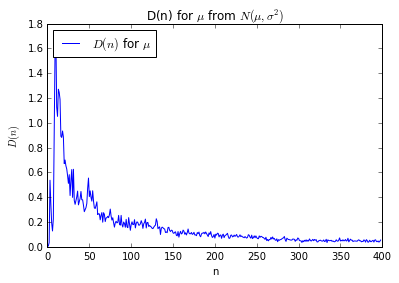

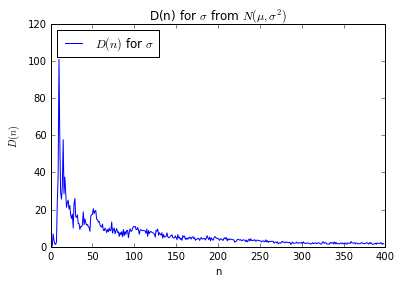

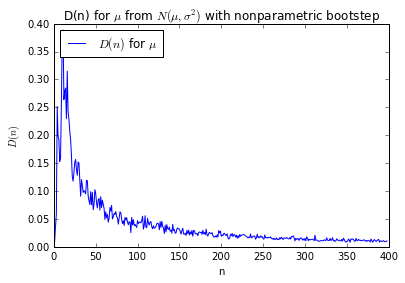

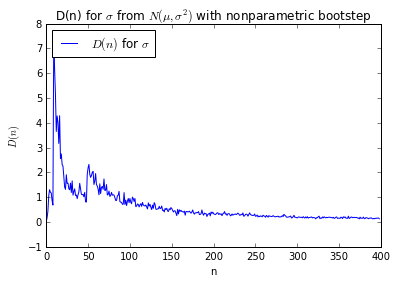

In [29]:
# Нормальное распределение

normalMuD = getBootstrepD(normalMuBootstrep)
normalSigmaD = getBootstrepD(normalSigmaBootstrep)
normalMuNonparametricD = getBootstrepD(normalMuNonparametricBootstrep)
normalSigmaNonparametricD = getBootstrepD(normalSigmaNonparametricBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(normalMuD, label="$D(n)$ for $\mu$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\mu$ from $N(\mu, \sigma^2)$")

myFigure, myAxis = plt.subplots()
myAxis.plot(normalSigmaD, label="$D(n)$ for $\sigma$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\sigma$ from $N(\mu, \sigma^2)$")

# Непараметрический Бутстреп
myFigure, myAxis = plt.subplots()
myAxis.plot(normalMuNonparametricD, label="$D(n)$ for $\mu$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\mu$ from $N(\mu, \sigma^2)$ with nonparametric Bootstrep")

myFigure, myAxis = plt.subplots()
myAxis.plot(normalSigmaNonparametricD, label="$D(n)$ for $\sigma$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\sigma$ from $N(\mu, \sigma^2)$ with nonparametric Bootstrep")

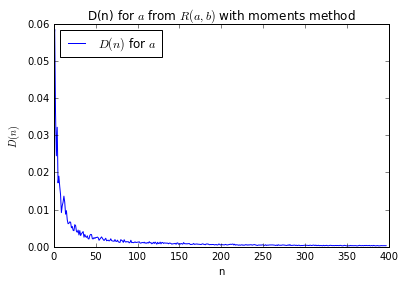

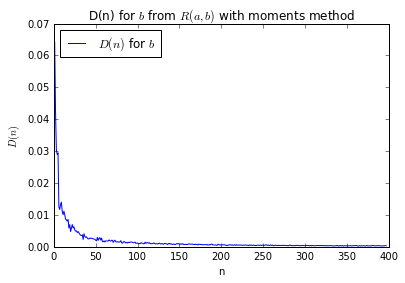

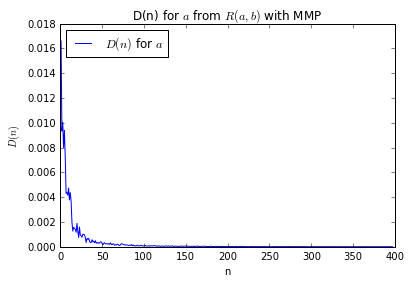

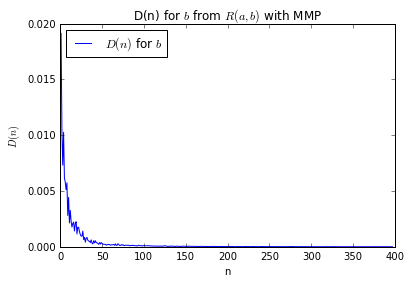

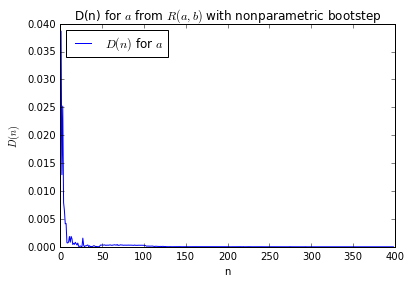

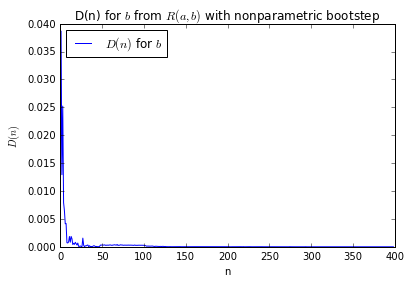

In [30]:
# Равномерное распределение
# Метод моментов
uniformAMomentsD = getBootstrepD(uniformAMomentsBootstrep)
uniformBMomentsD = getBootstrepD(uniformBMomentsBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformAMomentsD, label="$D(n)$ for $a$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $a$ from $R(a, b)$ with moments method")

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformBMomentsD, label="$D(n)$ for $b$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $b$ from $R(a, b)$ with moments method")

# И метод максимального правдоподобия
uniformAMMPD = getBootstrepD(uniformAMMPBootstrep)
uniformBMMPD = getBootstrepD(uniformBMMPBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformAMMPD, label="$D(n)$ for $a$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $a$ from $R(a, b)$ with MMP")

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformBMMPD, label="$D(n)$ for $b$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $b$ from $R(a, b)$ with MMP")

# А теперь непараметрический Бутстреп
uniformANonparametricD = getBootstrepD(uniformANonparametricBootstrep)
uniformBNonparametricD = getBootstrepD(uniformBNonparametricBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformANonparametricD, label="$D(n)$ for $a$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $a$ from $R(a, b)$ with nonparametric Bootstrep")

myFigure, myAxis = plt.subplots()
myAxis.plot(uniformBNonparametricD, label="$D(n)$ for $b$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $b$ from $R(a, b)$ with nonparametric Bootstrep")

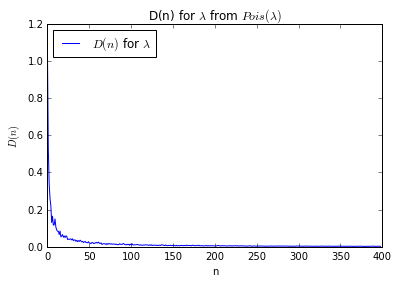

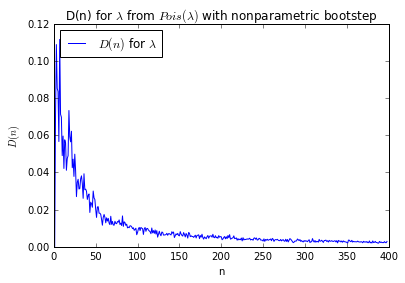

In [31]:
# Пуассоновское распределение
poissonLambdaD = getBootstrepD(poissonLambdaBootstrep)
poissonLambdaNonparametricD = getBootstrepD(poissonLambdaNonparametricBootstrep)

# Параметрический Бутстреп
myFigure, myAxis = plt.subplots()
myAxis.plot(poissonLambdaD, label="$D(n)$ for $\lambda$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\lambda$ from $Pois(\lambda)$")

# Напараметрический Бутстреп
myFigure, myAxis = plt.subplots()
myAxis.plot(poissonLambdaNonparametricD, label=r"$D(n)$ for $\lambda$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\lambda$ from $Pois(\lambda)$ with nonparametric Bootstrep")

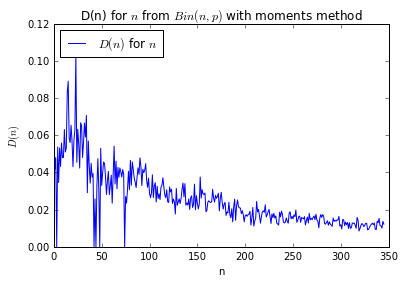

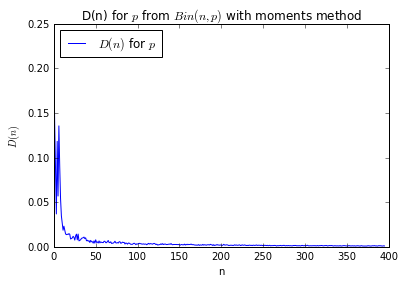

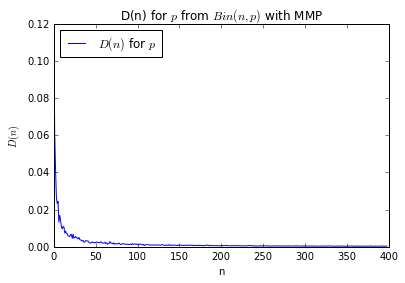

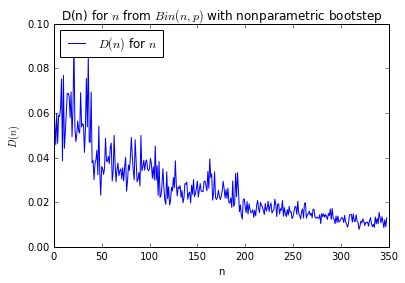

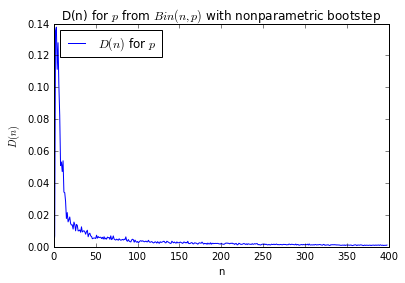

In [33]:
# Биномиальное распределение
# Метод моментов
binomialNMomentsD = getBootstrepD(binomialNMomentsBootstrep)
binomialPMomentsD = getBootstrepD(binomialPMomentsBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(binomialNMomentsD[50:], label="$D(n)$ for $n$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $n$ from $Bin(n, p)$ with moments method")

myFigure, myAxis = plt.subplots()
myAxis.plot(binomialPMomentsD, label="$D(n)$ for $p$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $p$ from $Bin(n, p)$ with moments method")

# Метод максимального правдоподобия
binomialPMMPD = getBootstrepD(binomialPMMPBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(binomialPMMPD, label="$D(n)$ for $p$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $p$ from $Bin(n, p)$ with MMP")

# Непараметрический Бутстреп
binomialNNonparametricD = getBootstrepD(binomialNNonparametricBootstrep)
binomialPNonparametricD = getBootstrepD(binomialPNonparametricBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(binomialNNonparametricD[50:], label="$D(n)$ for $n$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $n$ from $Bin(n, p)$ with nonparametric Bootstrep")

myFigure, myAxis = plt.subplots()
myAxis.plot(binomialPNonparametricD, label="$D(n)$ for $p$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $p$ from $Bin(n, p)$ with nonparametric Bootstrep")

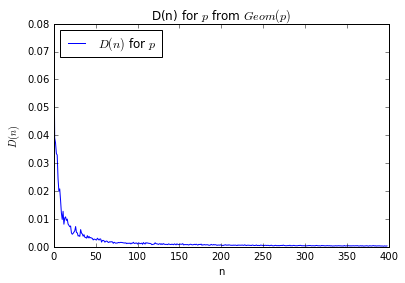

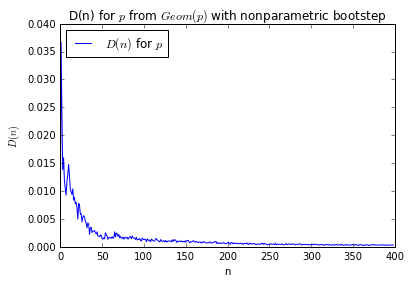

In [34]:
# Геометрическое распределение
# Параметрический Бутстреп
geometricPD = getBootstrepD(geometricPBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(geometricPD, label=r"$D(n)$ for $p$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $p$ from $Geom(p)$")

# Непараметрический Бутстреп
geometricPNonparametricD = getBootstrepD(geometricPNonparametricBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(geometricPNonparametricD, label=r"$D(n)$ for $p$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $p$ from $Geom(p)$ with nonparametric Bootstrep")

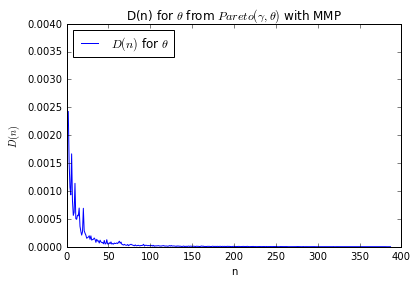

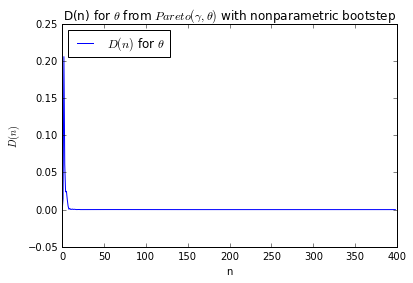

In [36]:
# Распределение Парето
# Параметрический Бутстреп
paretoThetaD = getBootstrepD(paretoThetaBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(paretoThetaD[10:], label=r"$D(n)$ for $\theta$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\theta$ from $Pareto(\gamma, \theta)$ with MMP")

# Непараметрический Бутстреп
paretoThetaNonparametricD = getBootstrepD(paretoThetaNonparametricBootstrep)

myFigure, myAxis = plt.subplots()
myAxis.plot(paretoThetaNonparametricD, label=r"$D(n)$ for $\theta$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$D(n)$")
myAxis.set_title(r"D(n) for $\theta$ from $Pareto(\gamma, \theta)$ with nonparametric Bootstrep")

Для разных значения параметров поситроить все эти замечательный графики я не осилил. Плохая структура кода. Чтобы её переделать не зватило времени. Полученые же результаты сведетельствуют либо об увеличении точности оценок, если считать очевидным, что выборочная дисперсия оценивает погрешность и о том, что выборочная дисперсия оценивает погрешность, если считать очевидным, что при увеличении размера выборки точность увеличивается.